## Data Understanding

### Numerical data in 16/21 columns

**account length** - the duration of time the client has been active

**area code** - area code of client residence

**number vmail messages** - total vmail messages sent by client

**total day minutes** - total day minutes used by client

**total day calls** - total number of day calls made

**total day charge** - total charge for the day calls

**total eve minutes** - total evening minutes used by client

**total eve calls** - total number of evening calls made

**total eve charge** - total charge for the evening calls

**total night minutes** - total night minutes used by client

**total night calls**- total number of night calls made

**total night charge** - total charge forthe night calls

**total intl minutes** - total international minutes used by the client

**total intl calls**- total number of international calls made

**total intl charge**- total charge for the international calls

**customer service calls** - total number of calls made by client to the customer service

### Categorical data in 5/21 columns

**state** - this is the state where the client resides

**phone number** - the phone contact of the client

**international plan** - for a client who has subscribed to an international plan

**voice mail plan** - for a client who has subscribed to a voicemail plan

**churn** - status of a client as either churned(True) or not churned(False) Syriatel company services

**state full names and abbreviations**

Alabama Ala. AL

Alaska Alaska AK

Arizona Ariz. AZ

Arkansas Ark. AR

California Calif. CA

Canal Zone C.Z. CZ

Colorado Colo. CO

Connecticut Conn. CT

Delaware Del. DE

District of Columbia D.C. DC

Florida Fla. FL

Georgia Ga. GA

Guam Guam GU

Hawaii Hawaii HI

Idaho Idaho ID

Illinois Ill. IL

Indiana Ind. IN

Iowa Iowa IA

Kansas Kan. KS

Kentucky Ky. KY

Louisiana La. LA

Maine Maine ME

Maryland Md. MD

Massachusetts Mass. MA

Michigan Mich. MI

Minnesota Minn. MN

Mississippi Miss. MS

Missouri Mo. MO

Montana Mont. MT

Nebraska Neb. NE

Nevada Nev. NV

New Hampshire N.H. NH

New Jersey N.J. NJ

New Mexico N.M. NM

New York N.Y. NY

North Carolina N.C. NC

North Dakota N.D. ND

Ohio Ohio OH

Oklahoma Okla. OK

Oregon Ore. OR

Pennsylvania Pa. PA

Puerto Rico P.R. PR

Rhode Island R.I. RI

South Carolina S.C. SC

South Dakota S.D. SD

Tennessee Tenn. TN

Texas Texas TX

Utah Utah UT

Vermont Vt. VT

Virgin Islands V.I. VI

Virginia Va. VA

Washington Wash. WA

West Virginia W.Va. WV

Wisconsin Wis. WI

Wyoming Wyo. WY

## Data Cleaning and EXploratory Data Analysis

### Importing necessary libraries

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import  GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import average_precision_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier


### Loading the dataset

In [11]:
# using pandas to read the data
df= pd.read_csv('Data.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
## Data Cleaning

In [13]:
# checking the rows and columns of our data
df.shape

(3333, 21)

In [14]:
# checking the columns of our data
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [15]:
# checking for null values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

There are no missing values in this dataset

In [16]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


The above dataframe gives the count, mean, std deviation,min and max value, and the 25th, 50th and 75th quartile

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

 phone_number, international_plan and voice_mail_plan are strings and our target churn which is boolean data type but the other features are numeric

#### Dropping irrelevant columns

We will be dropping phone number column since we won't need it

In [18]:
# dropping phone number column
df.drop(['phone number'], axis=1, inplace=True)

## Exploratory Data Analysis

### Exploring Area Code

We will explore the area code to see if it has any relations with customer churn

In [19]:
df['area code'].value_counts()

415    1655
510     840
408     838
Name: area code, dtype: int64

We have 3 area codes

In [20]:
from scipy.stats import pointbiserialr

# Calculate point-biserial correlation coefficient
correlation, p_value = pointbiserialr(df['area code'], df['churn'])

print("Point-biserial correlation coefficient:", correlation)
print("P-value:", p_value)


Point-biserial correlation coefficient: 0.006174233160678325
P-value: 0.7215998968003063


from the correlation coefficient we see that area code has a positive correlation of 0.7215998968003063 to the churn.

We will then plot a bar graph to show the churn rate of each area below.

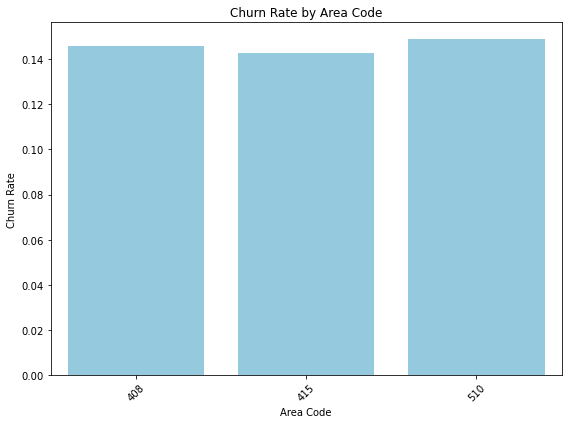

In [21]:
 #Calculate churn rate by area code
churn_rate = df.groupby("area code")["churn"].mean().reset_index()

#Plot churn rate by area code
plt.figure(figsize=(8, 6))
sns.barplot(data=churn_rate, x="area code", y="churn", color="skyblue")
plt.title("Churn Rate by Area Code")
plt.xlabel("Area Code")
plt.ylabel("Churn Rate")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the bar plot, we note that as much as the area code correlates with the churn, each area has close to the same rate of churn and thus making it a less relevant variable in our data set and hence we will drop it.

In [22]:
df.drop('area code', axis = 1, inplace = True)

### Exploring correlations

We will inspect the columns (total_day_minutes,total_day_calls, total_day_charge	total_eve_minutes, total_eve_calls, total_eve_charge, total_night_minutes	total_night_calls, total_night_charge, total_intl_minutes, total_intl_calls, total_intl_charge) to see if there are any correlations between them.

In [23]:
df[['total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge']]
df.corr()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
account length,1.000000,-0.004628,0.006216,0.038470,0.006214,-0.006757,0.019260,-0.006745,-0.008955,-0.013176,-0.008960,0.009514,0.020661,0.009546,-0.003796,0.016541
number vmail messages,-0.004628,1.000000,0.000778,-0.009548,0.000776,0.017562,-0.005864,0.017578,0.007681,0.007123,0.007663,0.002856,0.013957,0.002884,-0.013263,-0.089728
total day minutes,0.006216,0.000778,1.000000,0.006750,1.000000,0.007043,0.015769,0.007029,0.004323,0.022972,0.004300,-0.010155,0.008033,-0.010092,-0.013423,0.205151
total day calls,0.038470,-0.009548,0.006750,1.000000,0.006753,-0.021451,0.006462,-0.021449,0.022938,-0.019557,0.022927,0.021565,0.004574,0.021666,-0.018942,0.018459
total day charge,0.006214,0.000776,1.000000,0.006753,1.000000,0.007050,0.015769,0.007036,0.004324,0.022972,0.004301,-0.010157,0.008032,-0.010094,-0.013427,0.205151
total eve minutes,-0.006757,0.017562,0.007043,-0.021451,0.007050,1.000000,-0.011430,1.000000,-0.012584,0.007586,-0.012593,-0.011035,0.002541,-0.011067,-0.012985,0.092796
total eve calls,0.019260,-0.005864,0.015769,0.006462,0.015769,-0.011430,1.000000,-0.011423,-0.002093,0.007710,-0.002056,0.008703,0.017434,0.008674,0.002423,0.009233
total eve charge,-0.006745,0.017578,0.007029,-0.021449,0.007036,1.000000,-0.011423,1.000000,-0.012592,0.007596,-0.012601,-0.011043,0.002541,-0.011074,-0.012987,0.092786
total night minutes,-0.008955,0.007681,0.004323,0.022938,0.004324,-0.012584,-0.002093,-0.012592,1.000000,0.011204,0.999999,-0.015207,-0.012353,-0.015180,-0.009288,0.035493
total night calls,-0.013176,0.007123,0.022972,-0.019557,0.022972,0.007586,0.007710,0.007596,0.011204,1.000000,0.011188,-0.013605,0.000305,-0.013630,-0.012802,0.006141


From our correlation matrix we see that there is a  perfect correlation of 1, between all the minutes and charge features and hence we may need to combine these features later.

### Exploring customer churn column

In [24]:
#getting customer churn count
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

Here we note that there is a class imbalance in our dataset with class: True having 483 values and class: False having 2850 values. We will need to balance this later.

In [25]:
# percentage of customers that churn
churned=df[df['churn']==True].shape[0]
not_churned=df[df['churn']==False].shape[0]
print(churned/(churned+not_churned))

0.14491449144914492


<AxesSubplot:xlabel='churn', ylabel='count'>

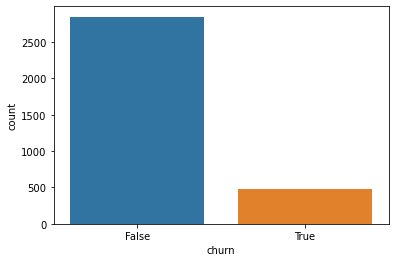

In [26]:
#getting churn visualization
sns.countplot(x='churn', data=df)

### Bar plot of top 15 states with the highest churn rate

We will explore the top states with the highest churn rate from our dataset.

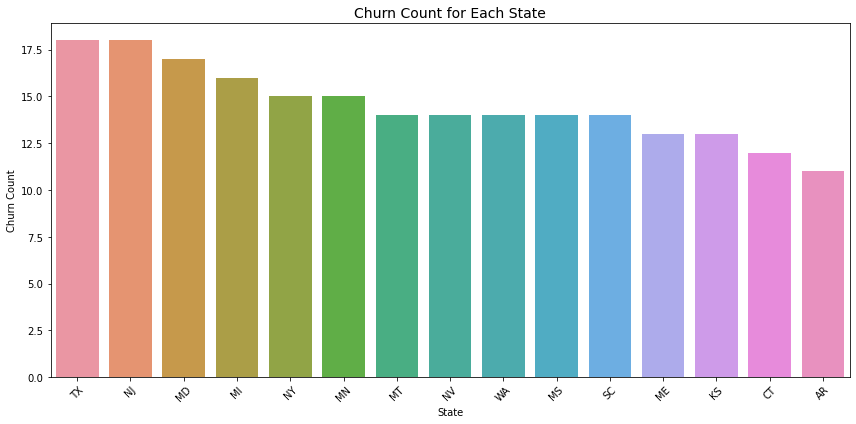

In [27]:
# bar plot of customers who churned
# getting churned df
churned_df = df[df['churn'] == True]

# getting churn counts for each state for churned customers
churn_counts = churned_df['state'].value_counts().sort_values(ascending=False)
top_15=churn_counts.head(15)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot churn  for each state  in descending order
sns.barplot(x=top_15.index, y=top_15.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels 
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Count for Each State', fontsize=14)

# display the plot
plt.tight_layout()  
plt.show()


State New Jersey has the highest churn rate followed by Texas from our visualization above.

### Bar plot of customers who did not churn

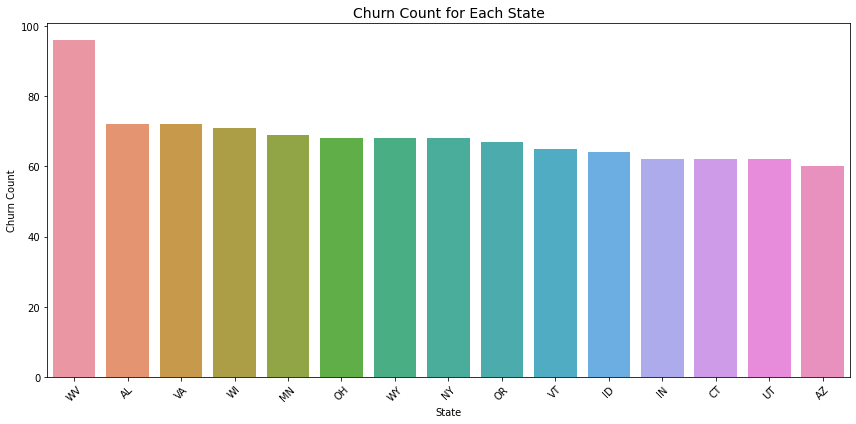

In [28]:
# bar plot of customers who did not churn
# getting customers that were retained df
non_churn_df = df[df['churn'] == False]

# getting non churn counts for each state for non churned customers
non_churn_counts = non_churn_df['state'].value_counts().sort_values(ascending=False)
top_15=non_churn_counts.head(15)
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Plot non churn  for each state  in descending order
sns.barplot(x=top_15.index, y=top_15.values)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set labels 
plt.xlabel('State')
plt.ylabel('Churn Count')
plt.title('Churn Count for Each State', fontsize=14)

# display the plot
plt.tight_layout()  
plt.show()

From the plot, the customers we retained the most are from West Virginia followed by Virginia.

## Exploring the customer service calls column

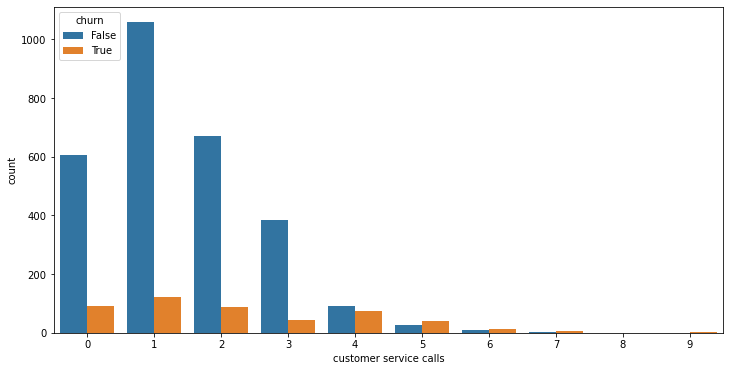

In [29]:
# Set the figure size
plt.figure(figsize=(12, 6))
sns.countplot(x='customer service calls', hue='churn', data=df)
#display
plt.show()

From the plot we see that the retained customers have higher calls but the churned ones equally contant customer service.

### Exploring the voice mail churn column

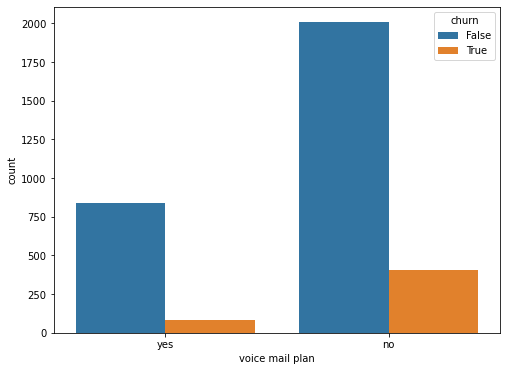

In [30]:
# Set the figure size
plt.figure(figsize=(8, 6))
sns.countplot(x='voice mail plan', hue='churn', data=df)
# display
plt.show()

Most of the churned customers did not have a voice mail plan.

### Exploring international plan column

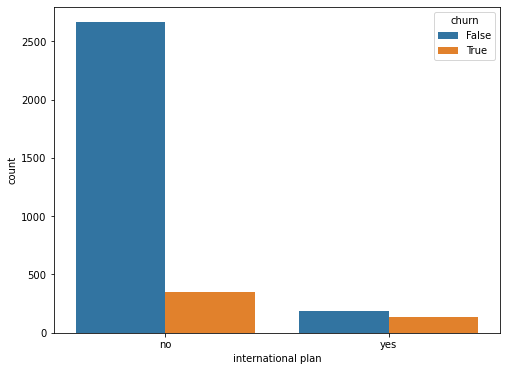

In [31]:
# Set the figure size
plt.figure(figsize=(8, 6))
sns.countplot(x='international plan', hue='churn', data=df)
# display
plt.show()

Most of the churned customers do not have an international plan.

## Distribution of total day charge

<Figure size 1080x576 with 0 Axes>

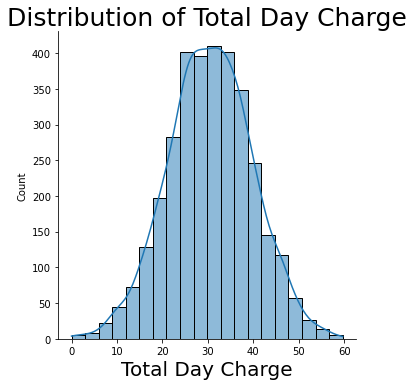

In [32]:
# plotting displot
plt.figure(figsize=(15,8))
sns.displot(df['total day charge'], bins=20, kde=True)
#setting labels
plt.title('Distribution of Total Day Charge', fontsize = 25)
plt.xlabel('Total Day Charge', fontsize = 20)
plt.show()

From the distribution the data is normally distributed.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   international plan      3333 non-null   object 
 3   voice mail plan         3333 non-null   object 
 4   number vmail messages   3333 non-null   int64  
 5   total day minutes       3333 non-null   float64
 6   total day calls         3333 non-null   int64  
 7   total day charge        3333 non-null   float64
 8   total eve minutes       3333 non-null   float64
 9   total eve calls         3333 non-null   int64  
 10  total eve charge        3333 non-null   float64
 11  total night minutes     3333 non-null   float64
 12  total night calls       3333 non-null   int64  
 13  total night charge      3333 non-null   float64
 14  total intl minutes      3333 non-null   

We have some objects in the data that need to be transformed to numeric before modelling.

## Encoding categorical data

We will first split our data into train and test splits before encoding it to prevent data leakage.

In [34]:
#Prepare the data
X = df.drop('churn', axis=1)
y = df['churn']

##  Binary encoding 

In [35]:
# Split the data into training and testing sets
# we will use a test size of 0.2 and random state of 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will do binary encoding using LabelEncoder from sklearn. And we will fit and transform categorical variables in training data and transform the same categorical variables in test data.

In [46]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the label encoder
label_encoder = LabelEncoder()

# Perform label encoding on training data
X_train.loc[:, 'international plan'] = label_encoder.fit_transform(X_train['international plan'])
X_train.loc[:, 'voice mail plan'] = label_encoder.fit_transform(X_train['voice mail plan'])
X_train.loc[:, 'international plan'] = X_train['international plan'].astype('int64')
X_train.loc[:, 'voice mail plan'] = X_train['voice mail plan'].astype('int64')

# Apply the transformation to the testing data
X_test.loc[:, 'international plan'] = label_encoder.transform(X_test['international plan'])
X_test.loc[:, 'voice mail plan'] = label_encoder.transform(X_test['voice mail plan'])



C:\Users\lenovo\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


### One Hot Encoding

### One hot encoding train data

We will perform one hot encoding on the state column to make it numerical. We will fit and transform the train set then transform the column as well in test set.

In [49]:
# instantiate ohe object
ohe = OneHotEncoder(sparse_output = False, handle_unknown = "ignore")

# fit ohe on small train data
ohe.fit(X_train[['state']])

# access the column names of the states
col_names = ohe.categories_[0]

# make a df with encoded states
train_state_encoded = pd.DataFrame(ohe.transform(X_train[["state"]]), 
                               index = X_train.index, 
                               columns = col_names)

# combine encoded states with X_t and drop old 'state' column
X_train = pd.concat([X_train.drop("state", axis = 1), train_state_encoded], axis = 1)

KeyError: "None of [Index(['state'], dtype='object')] are in the [columns]"

### One hot encoding test data

In [48]:
# df with encoded states
test_state_encoded = pd.DataFrame(ohe.transform(X_test[['state']]), 
                               index = X_test.index, 
                               columns = col_names)

# combine encoded states with X_test and drop old 'state' column
X_test = pd.concat([X_test.drop("state", axis = 1), test_state_encoded], axis = 1)

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [41]:
# checking first five rows of our data
X_train.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
817,UT,243,0,0,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2
1373,SC,108,0,0,0,112.0,105,19.04,193.7,110,16.46,208.9,93,9.40,4.1,4,1.11,4
679,TX,75,1,0,0,222.4,78,37.81,327.0,111,27.80,208.0,104,9.36,8.7,9,2.35,1
56,CO,141,0,0,0,126.9,98,21.57,180.0,62,15.30,140.8,128,6.34,8.0,2,2.16,1
1993,IN,86,0,0,0,216.3,96,36.77,266.3,77,22.64,214.0,110,9.63,4.5,3,1.22,0


In [34]:
X_train.tail()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
1095,106,0,0,0,274.4,120,46.65,198.6,82,16.88,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1130,122,0,0,0,35.1,62,5.97,180.8,89,15.37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,66,0,0,0,87.6,76,14.89,262.0,111,22.27,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,169,0,0,0,179.2,111,30.46,175.2,130,14.89,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3174,36,0,1,43,29.9,123,5.08,129.1,117,10.97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2666 entries, 817 to 3174
Data columns (total 68 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          2666 non-null   int64  
 1   international plan      2666 non-null   int64  
 2   voice mail plan         2666 non-null   int64  
 3   number vmail messages   2666 non-null   int64  
 4   total day minutes       2666 non-null   float64
 5   total day calls         2666 non-null   int64  
 6   total day charge        2666 non-null   float64
 7   total eve minutes       2666 non-null   float64
 8   total eve calls         2666 non-null   int64  
 9   total eve charge        2666 non-null   float64
 10  total night minutes     2666 non-null   float64
 11  total night calls       2666 non-null   int64  
 12  total night charge      2666 non-null   float64
 13  total intl minutes      2666 non-null   float64
 14  total intl calls        2666 non-null 

In [35]:
y_train.value_counts()

False    2284
True      382
Name: churn, dtype: int64

## Encoding target column to binary

In [36]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform train data
y_train = label_encoder.fit_transform(y_train)

# Transform test data (using the same label encoder fitted on train data)
y_test = label_encoder.transform(y_test)

## Feature Engineering

### Getting new features

We will come up with columns with the features, for total call duration, average charge per local and international calls, total charges and tenure years.

### On Train data

In [37]:
# Create new feature for total call duration 
X_train['total_call_duration'] = X_train['total day minutes'] + X_train['total eve minutes'] + X_train['total night minutes'] + X_train['total intl minutes']
#getting average call charges for international 
# Calculate average charge per call for international calls
X_train['average_charge_per_intl_call'] = X_train['total intl charge'] / X_train['total intl calls']
#getting average call charges for local
# Calculate average charge per call for local calls
local_call_charges= ['total day charge', 'total eve charge', 'total night charge']
total_local_call_charges= X_train[local_call_charges].sum(axis=1)
total_local_calls = X_train[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)
X_train['average_charge_per_local_call'] = total_local_call_charges / total_local_calls

# Calculate total charges
X_train['total_charges'] = (X_train['total day charge'] + X_train['total eve charge'] +
                       X_train['total night charge'] + X_train['total intl charge'])

# Convert account length to tenure in years
X_train['tenure_years'] = X_train['account length'] / 12



In [38]:
X_train.head()

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,...,VT,WA,WI,WV,WY,total_call_duration,average_charge_per_intl_call,average_charge_per_local_call,total_charges,tenure_years
817,243,0,0,0,95.5,92,16.24,163.7,63,13.91,...,0.0,0.0,0.0,0.0,0.0,530.0,0.296667,0.153993,43.82,20.250000
1373,108,0,0,0,112.0,105,19.04,193.7,110,16.46,...,0.0,0.0,0.0,0.0,0.0,518.7,0.277500,0.145779,46.01,9.000000
679,75,1,0,0,222.4,78,37.81,327.0,111,27.80,...,0.0,0.0,0.0,0.0,0.0,766.1,0.261111,0.255870,77.32,6.250000
56,141,0,0,0,126.9,98,21.57,180.0,62,15.30,...,0.0,0.0,0.0,0.0,0.0,455.7,1.080000,0.150035,45.37,11.750000
1993,86,0,0,0,216.3,96,36.77,266.3,77,22.64,...,0.0,0.0,0.0,0.0,0.0,701.1,0.406667,0.243958,70.26,7.166667


 ### On Test Data

In [39]:
# Create new feature for total call duration 
X_test['total_call_duration'] = X_test['total day minutes'] + X_test['total eve minutes'] + X_test['total night minutes'] + X_test['total intl minutes']
#getting average call charges for international 
# Calculate average charge per call for international calls
X_test['average_charge_per_intl_call'] = X_test['total intl charge'] / X_test['total intl calls']
#getting average call charges for local
# Calculate average charge per call for local calls
local_call_charges= ['total day charge', 'total eve charge', 'total night charge']
total_local_call_charges= X_test[local_call_charges].sum(axis=1)
total_local_calls = X_test[['total day calls', 'total eve calls', 'total night calls']].sum(axis=1)
X_test['average_charge_per_local_call'] = total_local_call_charges / total_local_calls

# Calculate total charges
X_test['total_charges'] = (X_test['total day charge'] + X_test['total eve charge'] +
                       X_test['total night charge'] + X_test['total intl charge'])

# Convert account length to tenure in years
X_test['tenure_years'] = X_test['account length'] / 12



In [40]:
# checking missing data
X_train.isnull().sum()

account length                    0
international plan                0
voice mail plan                   0
number vmail messages             0
total day minutes                 0
                                 ..
total_call_duration               0
average_charge_per_intl_call     14
average_charge_per_local_call     0
total_charges                     0
tenure_years                      0
Length: 73, dtype: int64

After feature engineering, we notice that there is a column with some missing data, the 'average_charge_per_intl_call' column. We will therefore replace it with the median since it is less sensitive to outliers. 

### Removing missing data

### On train data

In [41]:
# initialize imputer
imputer = SimpleImputer(strategy='median')

# Selecting the column to impute
column = ['average_charge_per_intl_call']

# Fit the imputer 
imputer.fit(X_train[column])

# Transform the column by replacing missing values with the median
X_train [column] = imputer.transform(X_train[column])

### On test data

In [42]:
# initialize imputer
imputer = SimpleImputer(strategy='median')

# Selecting the column to impute
column = ['average_charge_per_intl_call']

# Fit the imputer 
imputer.fit(X_test[column])

# Transform the column by replacing missing values with the median
X_test [column] = imputer.transform(X_test[column])

In [43]:
# ensuring null values have been replaced
X_train.isnull().sum()

account length                   0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
                                ..
total_call_duration              0
average_charge_per_intl_call     0
average_charge_per_local_call    0
total_charges                    0
tenure_years                     0
Length: 73, dtype: int64

### Dealing with class imbalance

In [62]:
# balancing the classes using SMOTE
# instantiating SMOTE
smote = SMOTE(random_state=42)
# fitting SMOTE on our data set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [63]:
# seeing if class imbalance has been solved
pd.Series(y_train_resampled).value_counts()

0    2284
1    2284
dtype: int64

The missing data have been removed

# Model Iterations

## 1). Logistic Regression Model.

**A). With Imbalanced Class Instances&Without Hyperparameter Tuning.

In [49]:
# Create a pipeline with StandardScaler and LogisticRegression
pipeline = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
# Fit the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [50]:
# Predictions on the testing set
y_pred = pipeline.predict(X_test)

In [60]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

### Confusion Matrix

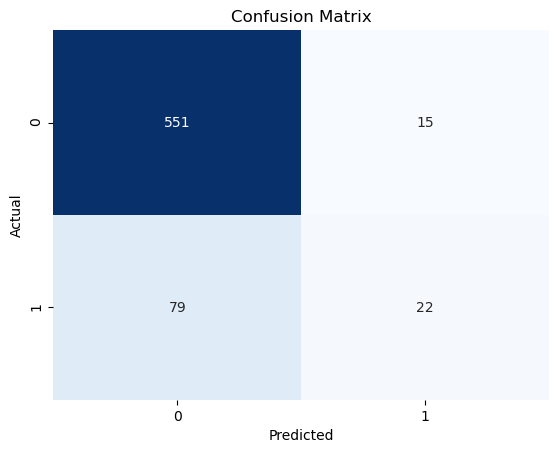

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

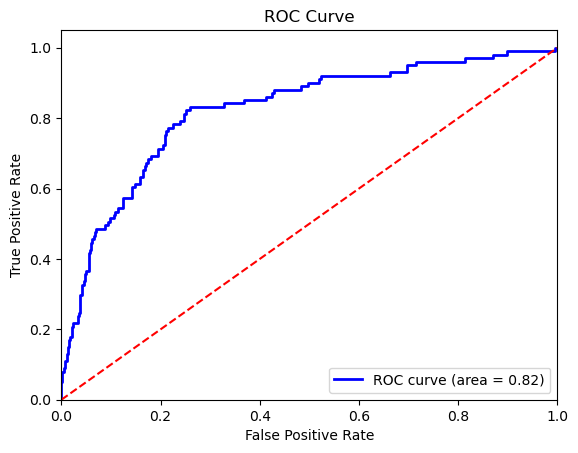

In [54]:
# Calculate probabilities for class 1
y_probs = pipeline.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# Calculate AUC
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

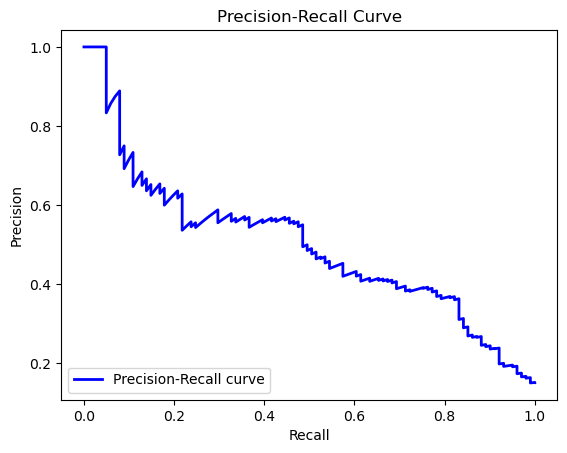

In [57]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
# Plot precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

In [61]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8590704647676162
Precision: 0.5945945945945946
Recall: 0.21782178217821782
F1 Score: 0.3188405797101449


**B).With Hyperparameter Tuning using GridSearchCV and Balanced class Instances:**

In [75]:
# Define hyperparameters grid for Grid Search
param_grid ={
'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
'penalty': ['l2']  # Only 'l2' penalty for lbfgs solver
}

In [79]:
# Train a Logistic Regression model with hyperparameter tuning using GridSearch
log_reg = LogisticRegression(solver='liblinear', random_state=42)
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=42, solver='liblinear'),
             n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l2']},
             scoring='accuracy')

In [80]:
# Best hyperparameters found
best_params = grid_search.best_params_

In [84]:
# Train the model with the best hyperparameters
best_log_reg = LogisticRegression(solver='liblinear', max_iter=1000, **best_params, random_state=42)
best_log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(C=100, max_iter=1000, random_state=42, solver='liblinear')

In [85]:
# Predictions on the testing set
y_pred = best_log_reg.predict(X_test)

### Confusion Matrix

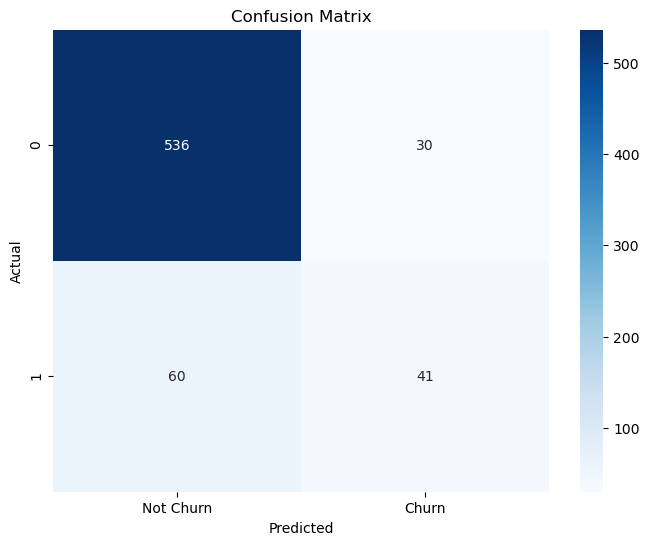

In [87]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve

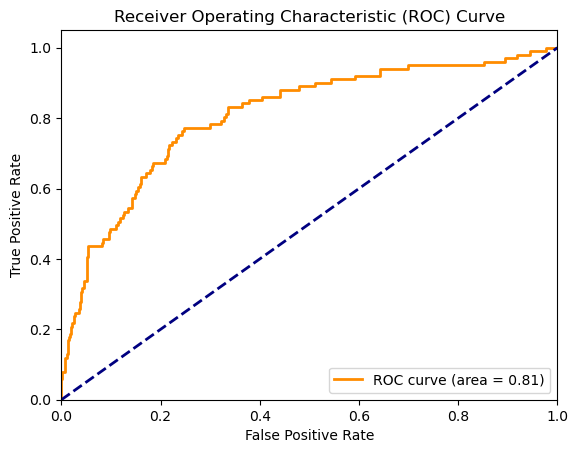

In [89]:
# Calculate predicted probabilities for the positive class
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Precision-Recall Curve

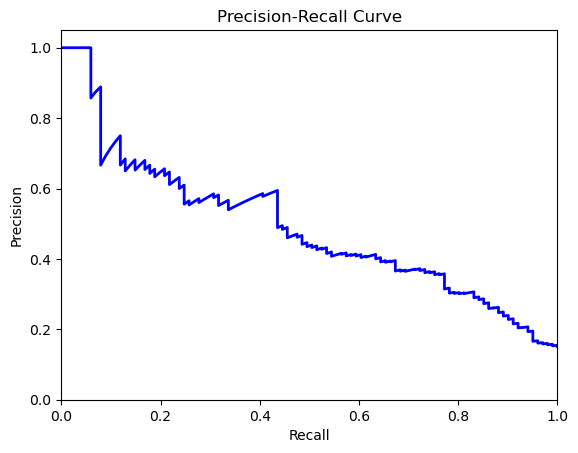

In [90]:
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
# Calculate predicted probabilities for the positive class
y_pred_proba = best_log_reg.predict_proba(X_test)[:, 1]
# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()

In [91]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8650674662668666
Precision: 0.5774647887323944
Recall: 0.40594059405940597
F1 Score: 0.47674418604651164


# Decision Trees Model

#### With balanced Class Instances and Parameter tuning.

In [119]:
# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [120]:
# Hyperparameter Tuning
param_grid ={
'criterion': ['gini', 'entropy'],
'max_depth': [None, 10, 20, 30, 40, 50],
'min_samples_split': [2, 5, 10],
'min_samples_leaf': [1, 2, 4],
'max_features': [None, 'sqrt', 'log2']}  # Remove 'auto' as a value
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [121]:
# Best hyperparameters found
best_params = grid_search.best_params_

In [122]:
# Train the model with the best hyperparameters
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [123]:
# Predictions on the testing set
y_pred = best_dt_classifier.predict(X_test)

In [124]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

### Confusion Matrix

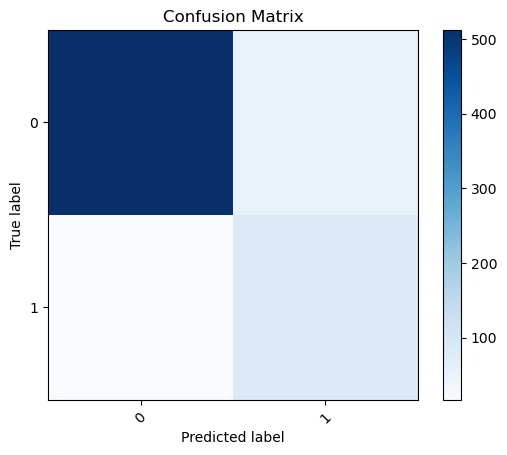

In [125]:
# Confusion Matrix
import numpy as np
cm = confusion_matrix(y_test, best_dt_classifier.predict(X_test))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = range(len(np.unique(y_test)))  # Assuming y_test contains the true
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

### ROC Curve

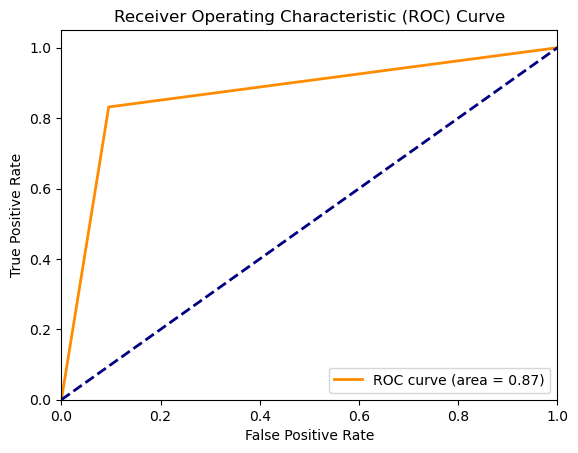

In [126]:
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, best_dt_classifier.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Precision-Recall Curve

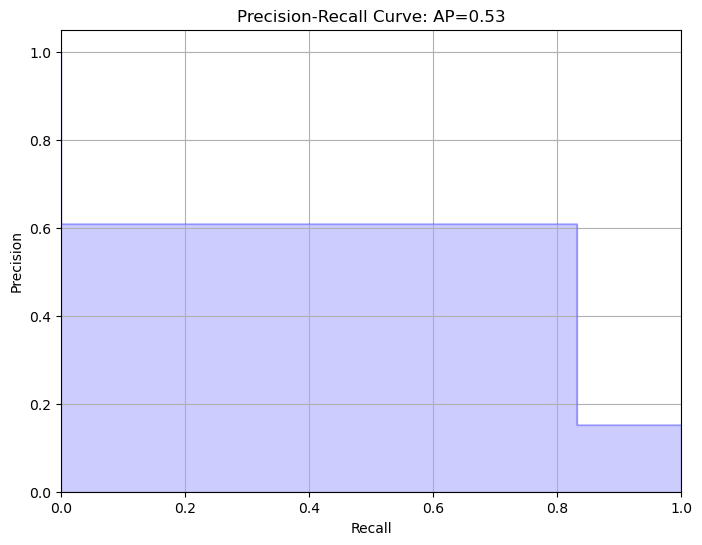

In [127]:
# Predict probabilities
y_score = best_dt_classifier.predict_proba(X_test)[:, 1]
# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
# Calculate average precision score
average_precision = average_precision_score(y_test, y_score)
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve: AP={average_precision:.2f}')
plt.grid(True)
plt.show()

In [128]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.8935532233883059
Precision: [0.15142429 0.60869565 1.        ]
Recall: [1.         0.83168317 0.        ]
F1 Score: 0.702928870292887


## Random Forest Model and XGBoost  before Any Tuning

We chose to use Random Forest and XGBoost since they are boost the performance of decision trees. And hence we wish to explore if the models will outperform decisiontree classifier as the baseline model. 

We will run Random Forest classifier and XGBoost with all features and default parameters to see how it performs before tuning it.

In [129]:
# definition a function for creating modesl
def create_models(seed=42):
    models =[]
    #appending the models to the model list.
    models.append((' XGB',  XGBClassifier(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed),))
    return models
models= create_models()


Classifier:  XGB, Accuracy: 0.9805097451274363
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.87      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.94      0.96       667
weighted avg       0.98      0.98      0.98       667

Top 10 Features Importance:
voice mail plan: 0.1937
total_charges: 0.1758
customer service calls: 0.1261
international plan: 0.1179
total intl calls: 0.0663
total intl minutes: 0.0392
average_charge_per_intl_call: 0.0313
TX: 0.0229
MT: 0.0201
total night calls: 0.0169


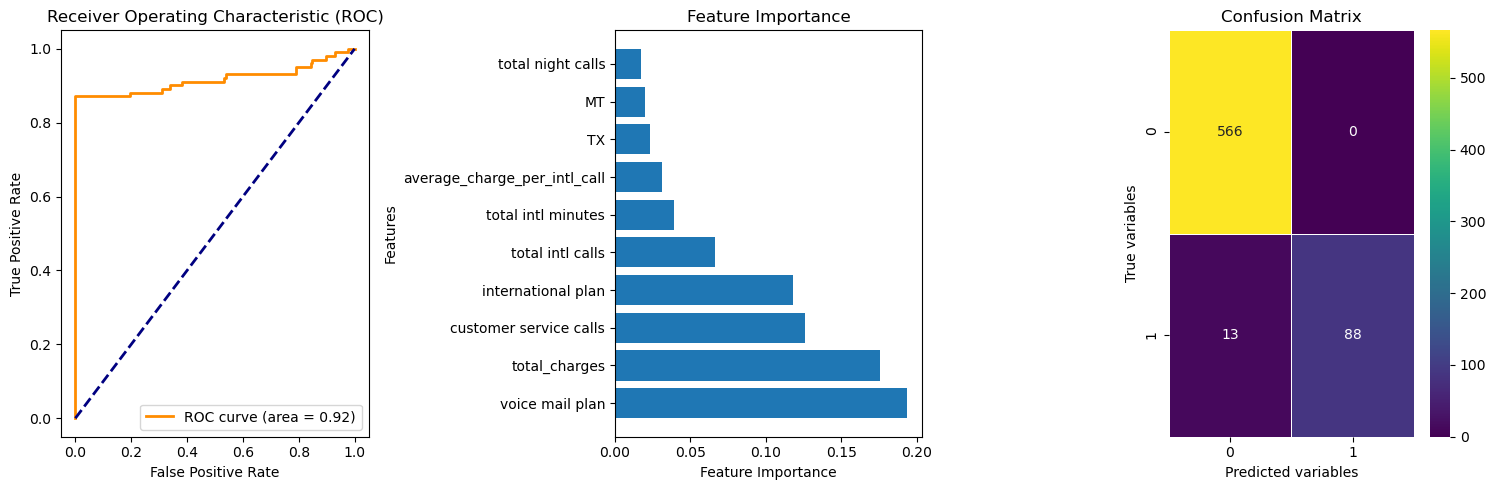

Classifier: random_forest, Accuracy: 0.9610194902548725
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.74      0.85       101

    accuracy                           0.96       667
   macro avg       0.98      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667

Top 10 Features Importance:
total_charges: 0.1223
customer service calls: 0.1094
total day charge: 0.0745
total day minutes: 0.0717
total_call_duration: 0.0696
international plan: 0.0632
average_charge_per_intl_call: 0.0356
average_charge_per_local_call: 0.0350
total eve charge: 0.0312
total intl charge: 0.0300


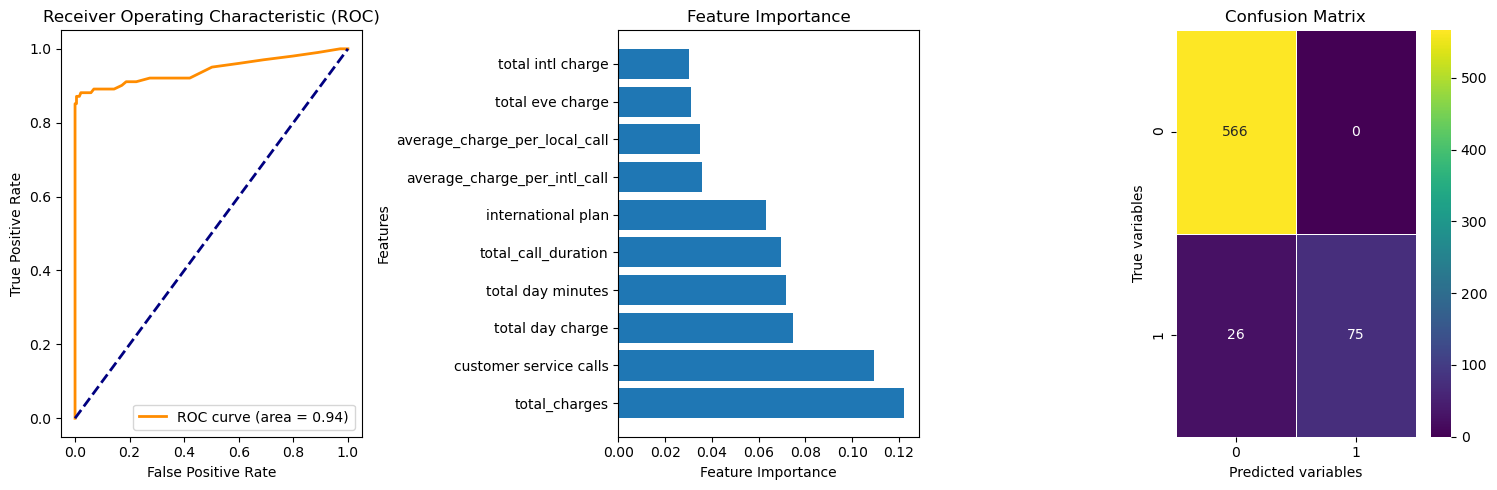

In [130]:
# creating a list of results, model name, and accuracy score
results = []
names = []
scoring = 'accuracy'

# Create a figure for each model
for name, model in models:
    # Create a figure with multiple subplots
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Fit model with training data
    model.fit(X_train, y_train)
    # Make predictions with testing data
    predictions = model.predict(X_test)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    # Append model name and accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # Print classifier accuracy
    print('Classifier: {}, Accuracy: {}'.format(name, accuracy))
    print(classification_report(y_test, predictions))
    
    # Calculate predicted probabilities for positive class
    y_proba = model.predict_proba(X_test)[:, 1]
    # getting fpr and tpr for roc
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    axes[0].plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].set_title('Receiver Operating Characteristic (ROC)')
    axes[0].legend(loc="lower right")
    
    # Feature importance for models that support it
    if hasattr(model, 'feature_importances_'):
        feature_importance = model.feature_importances_
        # Zip feature names and their importance scores
        feature_importance_dict = dict(zip(X_train.columns, feature_importance))
        # Sort feature importance in descending order
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
        # Print feature importance
        print('Top 10 Features Importance:')
        for feature, importance in sorted_feature_importance[:10]:
            print('{}: {:.4f}'.format(feature, importance))

        # Plot feature importance
        features = [x[0] for x in sorted_feature_importance[:10]]
        importance = [x[1] for x in sorted_feature_importance[:10]]
        axes[1].barh(features, importance)
        axes[1].set_xlabel('Feature Importance')
        axes[1].set_ylabel('Features')
        axes[1].set_title('Feature Importance')
        
    # Visualizing model performance using confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)
    sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5, ax=axes[2])
    axes[2].set_title("Confusion Matrix")
    axes[2].set_xlabel("Predicted variables")
    axes[2].set_ylabel("True variables")

    # Adjust layout and spacing
    plt.tight_layout()
    # Display the plot
    plt.show()


From the plots above, we notice that from the ROC curve, we have some false positives which affects the true positive rate for both Random Forest and XGBoost. We see that voice mail plan is the most important feature for XGBoost and total charges is the most important feature for Random Forest classifier.We also notice that the oversampled class which is 0, performs better than the undersampled class.

### Evaluation On train data


In [ ]:
# Create a figure for each model
for name, model in models:
    # Fit model with training data
    model.fit(X_train, y_train)
    # Make predictions with testing data
    predict_train = model.predict(X_train)
    # Calculate metrics
    accuracy = accuracy_score(y_train, predict_train)
    precision = precision_score(y_train, predict_train)
    recall = recall_score(y_train, predict_train)
    f1 = f1_score(y_train, predict_train)
    # Print classifier name and metrics
    print('Classifier:', name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

From the metrics. All the metrics have perfect scores for the train model

### Evaluation On test data


In [135]:
# Create a figure for each model for test data
for name, model in models:
    # Fit model with training data
    model.fit(X_train, y_train)
    # Make predictions with testing data
    predictions = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    # Print classifier name and metrics
    print('Classifier:', name)
    print('Accuracy:', accuracy)
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-score:', f1)

Classifier:  XGB
Accuracy: 0.9805097451274363
Precision: 1.0
Recall: 0.8712871287128713
F1-score: 0.9312169312169312
Classifier: random_forest
Accuracy: 0.9610194902548725
Precision: 1.0
Recall: 0.7425742574257426
F1-score: 0.8522727272727273


From the evaluation metrics above, XGBoost has an accuracy score of 0.9805097451274363, but a recall of 0.8712871287128713, for RandomForest, we have an accuracy score of 0.9610194902548725 which seems okay but recall is at 0.7425742574257426 this means that we have a low true positive rate for the two models. However we have class imbalance that could be affecting our performance metrics and hence we will first balance the classes and see how the models perform.But there is a huge difference on train data.

## Random Forest Model after Parameter Tuning

We are going to run our model now, after tuning it to see if the performance improves after model tuning. We will use random search to find the best parameters for the model.

**On train data and test data**

In [132]:
# Define a function to perform random search and evaluate the model
def perform_grid_search(classifier, param_grid):
    # Define the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])
    
    # Perform GridSearchCV
    random_search = GridSearchCV(estimator = pipe,
                       param_grid=param_grid,
                       scoring = 'accuracy',
                       cv=5)
    random_search.fit(X_train_resampled, y_train_resampled)

    # Get the best parameters
    best_params = random_search.best_params_
    print("Best Parameters:", best_params)

    # Evaluate the model on the test set
    y_pred = random_search.predict(X_test)
    y_pred_train = random_search.predict(X_train)
    
    # Calculate evaluation metrics for test
    accuracy_test = accuracy_score(y_test, y_pred)
    precision_test = precision_score(y_test, y_pred)
    recall_test = recall_score(y_test, y_pred)
    f1_test = f1_score(y_test, y_pred)
    
    # Calculate evaluation metrics for train
    accuracy_train = accuracy_score(y_train, y_train)
    precision_train = precision_score(y_train, y_pred_train)
    recall_train= recall_score(y_train, y_pred_train)
    f1_train = f1_score(y_train, y_pred_train)
    
    # Print evaluation metrics for test
    print("Test Accuracy:", accuracy_test)
    print("Test Precision:", precision_test)
    print("Test Recall:", recall_test)
    print("Test F1 Score:", f1_test)
    
    # Print evaluation metrics for train
    print("Train Accuracy:", accuracy_train)
    print("Train Precision:", precision_train)
    print("Train Recall:", recall_train)
    print("Train F1 Score:", f1_train)
    
    # Classification report
    print("Classification Report:")
    #print(classification_report(y_test, y_pred))

    
    return  best_params, accuracy, random_search
    

In [136]:
classifier= RandomForestClassifier(random_state=42)
param_grid = [{'classifier__max_depth': [None, 2,6,10],
        'classifier__min_samples_split': [5,10]}] 
best_params, accuracy, random_search = perform_grid_search(classifier, param_grid)


Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_split': 5}
Test Accuracy: 0.95952023988006
Precision: 0.9868421052631579
Recall: 0.7425742574257426
F1 Score: 0.847457627118644
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       0.99      0.74      0.85       101

    accuracy                           0.96       667
   macro avg       0.97      0.87      0.91       667
weighted avg       0.96      0.96      0.96       667



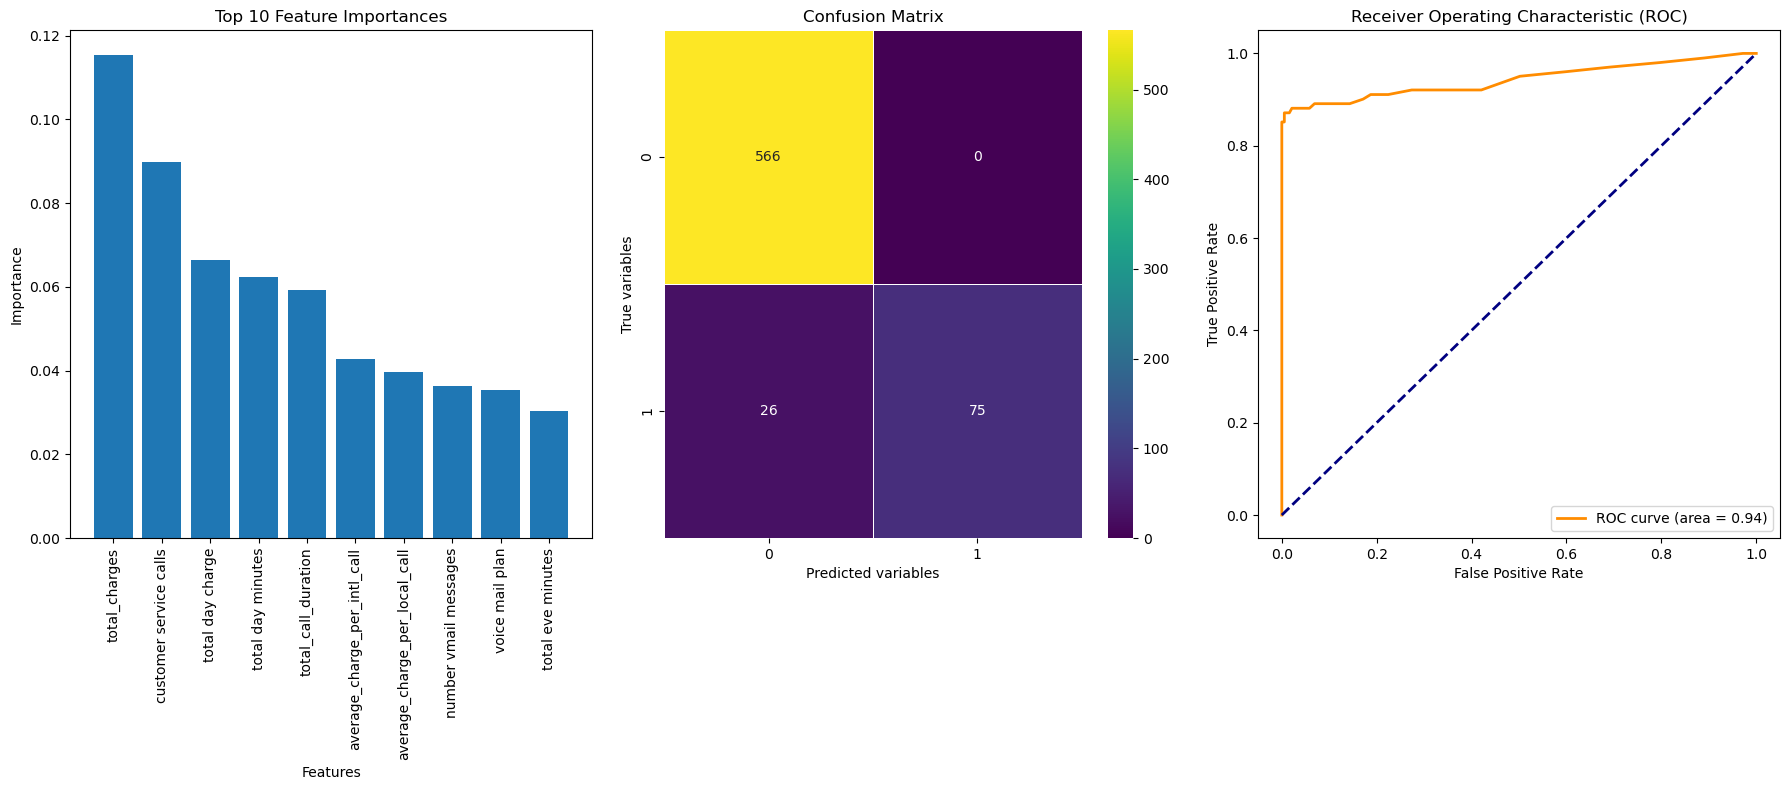

In [134]:
# Plot horizontal bar graph
plt.figure(figsize=(18, 8))
plt.subplot(1, 3, 1)
n_of_features = 10  
feature_importances = random_search.best_estimator_['classifier'].feature_importances_
# Get indices of top 10 features
indices = np.argsort(feature_importances)[::-1][:n_of_features]
# getting labels
plt.title("Top 10 Feature Importances")
plt.bar(range(n_of_features), feature_importances[indices], align="center", )
plt.xticks(range(n_of_features), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance")

# visualizing model performance using confusion matrix
plt.subplot(1, 3, 2)
conf_matrix = confusion_matrix(y_test, predictions)
#plotting heatmap
sns.heatmap(conf_matrix, annot=True, cmap="viridis", fmt="d", linewidths=.5)
# setting the labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted variables")
plt.ylabel("True variables")
# plot for ROC curve
plt.subplot(1, 3, 3)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
# displaying the data
plt.tight_layout()
plt.show()

After tuning our model and solving class imbalance, Random Forest model, Accuracy is at 0.9565217391304348 which is a very slight decrease from the one with default parameters. Precision has dropped to 0.9390243902439024 and Recall has increased slightly  to 0.7623762376237624. For train data, the metrics still score 100% percent, a possibility of overfitting

## XGBoost model after Parameter Tuning

Hyperparameters :learning rate,max_depth,min_child weight,subsample,number of
trees(n_estimators). GridSearchCV - search through a predefined hyperparameter grid, and the best
parameters are selected based on accuracy.

In [137]:
# Instantiate XGBClassifier
clf = XGBClassifier()
# Fit XGBClassifier
clf.fit(X_train_resampled, y_train_resampled)
# Predict on training and test sets
training_preds = clf.predict(X_train_resampled)
test_preds = clf.predict(X_test)

In [138]:
# Define the hyperparameter grid
param_grid = {
'learning_rate': [0.1, 0.2],
'max_depth': [6,8],
'min_child_weight': [1, 2],
'subsample': [0.5, 0.7],
'n_estimators': [100],
}
# Create the GridSearchCV object
grid_clf = GridSearchCV(clf, param_grid,scoring='accuracy', cv=5)

# Fit the GridSearchCV object to the data
grid_clf.fit(X_train_resampled, y_train_resampled)
grid_clf.fit(X_test,y_test)

best_parameters = grid_clf.best_params_

best_parameters

{'learning_rate': 0.2,
 'max_depth': 8,
 'min_child_weight': 2,
 'n_estimators': 100,
 'subsample': 0.7}

After performing grid search and finding the best hyperparameters using GridSearchCV,the best
model is used to make predictions on both the training and test sets.Accuracy scores are calculated
for both the training and test sets

In [139]:
# Evaluate the model on the test set
y_pred = grid_clf.predict(X_test)

# Calculate evaluation metrics
train_accuracy = accuracy_score(y_train_resampled, training_preds)
train_recall = recall_score(y_train_resampled, training_preds)
train_precision = precision_score(y_train_resampled, training_preds)
train_f1 = f1_score(y_train_resampled, training_preds)
test_accuracy = accuracy_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Training Accuracy:", train_accuracy)
print("Train Recall:", train_recall)
print("Train Precision:",train_precision)
print("Train F1 Score:", train_f1)
print("Test Accuracy:", test_accuracy)
print("Test Recall:", test_recall)
print("Test Precision:",test_precision)
print("Test F1 Score:", test_f1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Test Accuracy: 0.9790104947526237
Precision: 1.0
Recall: 0.8613861386138614
F1 Score: 0.925531914893617
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       566
           1       1.00      0.86      0.93       101

    accuracy                           0.98       667
   macro avg       0.99      0.93      0.96       667
weighted avg       0.98      0.98      0.98       667



The model's accuracy slightly decreased after tuning.Test Precision slightly decreased to 97.72%.Recall decreased from 87.13% to 84.16%, suggesting that the tuned model may have missed some positive cases compared to the untuned model. F1 score decreased from 93.12% to 91.40%, reflecting the combined effect of precision and recall. The model demonstrates high accuracy and recall, suggesting its ability to correctly identify positive instances, both in the training and testing datasets. Precision is also high, indicating a low rate of false positives.

In [ ]:
# Get the best model
best_model = grid_clf.best_estimator_

# Get feature importances from the best model
feature_importance = best_model.feature_importances_

# Assuming X_train_resampled is your training feature matrix
# Create a DataFrame to associate feature names with their importances
feature_importance_df = pd.DataFrame({'Feature': X_train_resampled.columns, 'Importance': feature_importance})


# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print or visualize the feature importances
print("Feature Importances:")
print(feature_importance_df)

In [ ]:
#Plotting the feature importance for Top 10 most important columns
# Select the top 10 features
top_10_features = feature_importance_df.head(10)
# Plot the feature importance using a bar graph
plt.figure(figsize=(10, 6))
plt.bar(top_10_features['Feature'], top_10_features['Importance'], color='blue')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 10 Most Important Features')
plt.xticks(rotation=45, ha='right')
plt.show()

## K-Nearest Model.

**A).With Balanced Class Instances,without hyperparameters.**

**Training the model**

In [158]:
# KNN classifier
knn_classifier =KNeighborsClassifier(metric='manhattan', 
n_neighbors=3, weights='distance')


In [159]:
# Training the classifier
knn_classifier.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [ ]:
#Predict values
y_pred =knn_classifier.predict(X_test)

In [ ]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
# Print evaluation metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

**B).**B).With Balanced Class Instances and hyperparameters.**

In [163]:
# Define the parameter grid
param_grid ={
'n_neighbors': [3, 5, 7, 9, 11],
'weights': ['uniform', 'distance'],'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [164]:
# KNN model
knn =KNeighborsClassifier()

In [165]:
# GridSearchCV
grid_search =GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

In [166]:
# Fit the model
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [167]:
# Get the best parameters
best_params =grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
# Predict using the trained model
y_pred =grid_search.predict(X_test)

**Evaluate Model Performance:**

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
accuracy =accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy )
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

### Confusion matrix

In [161]:
# Create the confusion matrix
conf_matrix =confusion_matrix(y_test, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[83 10]
 [21 86]]


<Axes: >

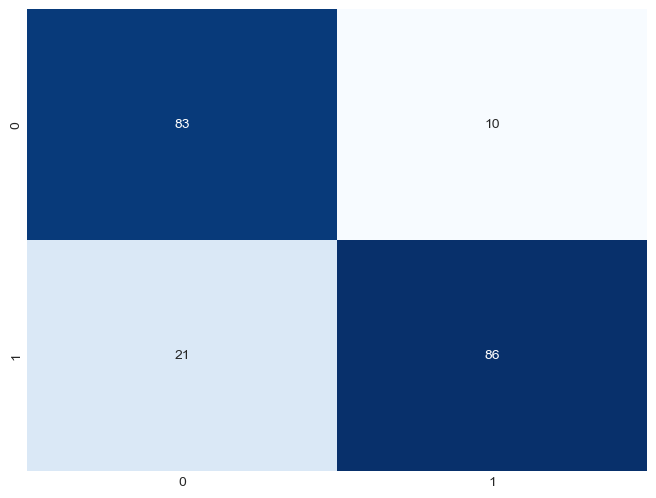

In [162]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
cbar=False)

# The Support Vector Machine model before tuning

In [1]:
# checking X_train values
X_train.value_counts()

NameError: name 'X_train' is not defined

In [ ]:
# checking y_train values
import pandas as pd

# Convert numpy array to pandas Series
y_train_series = pd.Series(y_train)

# Get value counts
value_counts = y_train_series.value_counts()

# Print value counts
print(value_counts)

In [ ]:
#getting customer churn count before sorting imbalance
df['churn'].value_counts()

**Training the model before tuning**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Creating a linear SVM classifier
svm_classifier_linear = SVC(kernel='linear', random_state=42)

# Training the linear SVM classifier on the training data
svm_classifier_linear.fit(X_train, y_train)

# Creating an SVM classifier with RBF kernel
svm_classifier_rbf = SVC(kernel='rbf', random_state=42)

# Training the RBF SVM classifier on the training data
svm_classifier_rbf.fit(X_train, y_train)


# Checking baseline model accuracy before tuning


**On train data**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Initialize the SVC classifier
svc_classifier = SVC()

# Train the classifier on the original training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the training data
y_pred_train = svc_classifier.predict(X_train)

# Calculate the accuracy on the training data
accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy on the original training data:", accuracy)


**On test data**

In [ ]:
from sklearn.metrics import accuracy_score



# Make predictions on the test data
y_pred_test = svc_classifier.predict(X_test)

# Calculate the accuracy on the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on the test data before tuning:", accuracy_test)


In [ ]:
# plotting a ROC curve 

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize the SVC classifier with probability=True
svc_classifier = SVC(probability=True)

# Train the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Get predicted probabilities for the positive class
y_prob = svc_classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calculate the Area Under the Curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**The ROC-AUC is 0.76 which indicates that the model has moderate to good discriminatory power before tuning and resampling**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Once your data is preprocessed, you can use it to train your model.
model.fit(X_train, y_train)

# Predictions on train data
y_train_pred = model.predict(X_train)

# Predictions on test data
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Precision
train_precision = precision_score(y_train, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

# Recall (Sensitivity)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# F1 Score
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print("Train ROC AUC Score:", train_roc_auc)
print("Test ROC AUC Score:", test_roc_auc)

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Test Confusion Matrix:")
print(test_conf_matrix)


**The model has an accuracy of 0.961, precision of 1.0, recall of 0.742 and f1 score of 0.852 for the test data and 1.0 for all parameters on the train data before tuning**

In [ ]:
# plotting a confusion matrix for the predictions made on the train and test data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the train and test data
y_train_pred = svc_classifier.predict(X_train)
y_test_pred = svc_classifier.predict(X_test)

# Calculate the confusion matrices
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix for train data
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Train Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot the confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



**The Train confusion matrix shows 2284 True positives and 382 false positives with 0 true negatives and false negatives while the Test confusion matrix shows 566 True positives and 101 false positives with 0 true negatives and false negatives**



**getting the top 10 best features in the model before tuning**

In [ ]:
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize the SVC model
svc = SVC(kernel='linear', probability=True)  # Use a linear kernel for feature importance

# Train the model
svc.fit(X_train_scaled, y_train)

# Get the learned coefficients or feature weights
coefficients = svc.coef_[0]

# Sort the absolute coefficients and select the top 10 features
top_10_indices = np.argsort(np.abs(coefficients))[-10:]
top_10_features = [X_train.columns[i] for i in top_10_indices]
top_10_coefficients = coefficients[top_10_indices]

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_features)), np.abs(top_10_coefficients))
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Absolute Coefficients)')
plt.show()




**The best features in this model before tuning that influence churn rate is total international minutes, total intl charge and total night charge**




# Dealing with class imbalance

**Balancing the imbalanced class**

In [ ]:
# balancing the classes using SMOTE
# instantiating SMOTE
smote = SMOTE(random_state=42)
# fitting SMOTE on our data set
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [ ]:
# seeing if class imbalance has been solved
pd.Series(y_train_resampled).value_counts()

**Performing tuning of the model using Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {'C': [0.1, 1], 'kernel': ['linear']}


# Create an SVM classifier with random_state set to 42
svm_classifier = SVC(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Print the best parameters and best estimator
print("Best Parameters:", best_params)
print("Best Estimator:", best_svm_classifier)

**Performing tuning of the model using Gridsearch**

In [ ]:
from sklearn.model_selection import GridSearchCV
# Define the parameter grid to search
param_grid = {'C': [0.1, 1], 'kernel': ['linear']}


# Create an SVM classifier with random_state set to 42
svm_classifier = SVC(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_svm_classifier = grid_search.best_estimator_

# Print the best parameters and best estimator
print("Best Parameters:", best_params)
print("Best Estimator:", best_svm_classifier)

# Checking model accuracy after tuning

**On train data**

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target labels for the resampled training data
y_train_pred = best_svm_classifier.predict(X_train_resampled)

# Calculate accuracy score on the resampled training data
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Accuracy on Train Data (after resampling):", train_accuracy)


**On test data**

In [ ]:
from sklearn.metrics import accuracy_score

# Predict the target labels for the test data
y_pred = best_svm_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy after resampling:", accuracy)

**checking ROC_AUC after tuning**

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the model on the resampled training data
model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities of the positive class for the resampled training data
y_prob = model.predict_proba(X_train_resampled)[:, 1]

# Calculate false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_train_resampled, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


**The ROC-AUC is 1.00 which indicates that the model has perfect discriminatory power after resampling and tuning. This could imply overfitting of data or data leakage, so we will look at other metrics.**



**We will also plot a confusion matrix**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


# Predictions on train data
y_train_pred = model.predict(X_train_resampled)

# Predictions on test data
y_test_pred = model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Precision
train_precision = precision_score(y_train_resampled, y_train_pred)
test_precision = precision_score(y_test, y_test_pred)
print("Train Precision:", train_precision)
print("Test Precision:", test_precision)

# Recall (Sensitivity)
train_recall = recall_score(y_train_resampled, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)
print("Train Recall:", train_recall)
print("Test Recall:", test_recall)

# F1 Score
train_f1 = f1_score(y_train_resampled, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)
print("Train F1 Score:", train_f1)
print("Test F1 Score:", test_f1)

# ROC AUC Score
train_roc_auc = roc_auc_score(y_train_resampled, y_train_pred)
test_roc_auc = roc_auc_score(y_test, y_test_pred)
print("Train ROC AUC Score:", train_roc_auc)
print("Test ROC AUC Score:", test_roc_auc)

# Confusion Matrix
train_conf_matrix = confusion_matrix(y_train_resampled, y_train_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Train Confusion Matrix:")
print(train_conf_matrix)
print("Test Confusion Matrix:")
print(test_conf_matrix)


**The metrics show an accuracy of 0.956, a precision of 0.95, recall of 0.752 and f1 score of 0.839 on the test data and 1.0 for all metrics on the train data after tuning. this confirms that our model performance is very good.**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix for Train Data
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Plot Confusion Matrix for Test Data
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


**The Train confusion matrix now picks 2284 True positives, 2284 true negatives,with 0 True negatives and false negatives after tuning indicating perfect model performance, while the Test confusion matrix pick a good mixture of the 4 parameters in this context, indicating a more realistic scenario.**



**getting the top 10 best features in the model before tuning**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Assuming X_train_resampled and y_train_resampled are your resampled training data

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)

# Initialize the SVC model
svc = SVC(kernel='linear', probability=True)  # Use a linear kernel for feature importance

# Train the model
svc.fit(X_train_scaled, y_train_resampled)

# Get the learned coefficients or feature weights
coefficients = svc.coef_[0]

# Sort the absolute coefficients and select the top 10 features
top_10_indices = np.argsort(np.abs(coefficients))[-10:]
top_10_features = [X_train_resampled.columns[i] for i in top_10_indices]
top_10_coefficients = coefficients[top_10_indices]

# Plot the top 10 feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_10_features)), np.abs(top_10_coefficients))
plt.yticks(range(len(top_10_features)), top_10_features)
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importance (Absolute Coefficients)')
plt.show()


**After tuning, the best features in the model that influence churn rate is the tenure years, account length and voice mail plan from the initial total international minutes, total intl charge and total night charge before tuning**



**In summary, these were the findings from the Support Vector machine model:**

**Before tuning**

The model has an accuracy of 0.961, precision of 1.0, recall of 0.742 and f1 score of 0.852 for the test data and 1.0 for all parameters on the train data before tuning.

The ROC-AUC is 0.76 which indicates that the model has moderate to good discriminatory power before tuning and resampling

The Train confusion matrix showed 2284 True positives and 382 false positives with 0 true negatives and false negatives while the Test confusion matrix shows 566 True positives and 101 false positives with 0 true negatives and false negatives.

The best features in this model before tuning that influence churn rate is total international minutes, total intl charge and total night charge

**After tuning**

The model has an accuracy of 0.956, a precision of 0.95, recall of 0.752 and f1 score of 0.839 on the test data and 1.0 for all metrics on the train data after tuning. All the parameters have reduced for the test data except the recall. This could mean that there were significant improvements made to the model post tuning such as reduction in overfitting and better generalization, hence the slight reduction in metric values. The values for the Train data remain the same.

The ROC-AUC is 1.00 which indicates that the model has perfect discriminatory power after resampling and tuning. This could imply overfitting of data or data leakage, so we will look at other metrics.

The other metrics show a precision of 0.95, recall of 0.752 and f1 score of 0.839 on the test data and 1.0 for all metrics on the train data after tuning. This confirms great performance of our model.

The Train confusion matrix are now picks 2284 True positives, 2284 true negatives,with 0 True negatives and false negatives after tuning indicating perfect model performance, while the Test confusion matrix pick a good mixture of the 4 parameters in this context, indicating a more realistic scenario.

After tuning, the best features in the model that influence churn rate is the tenure years, account length and voice mail plan from the initial total international minutes, total intl charge and total night charge before tuning